<a href="https://colab.research.google.com/github/ahmedlila/Machine-Learning-Course-Implementations/blob/main/Lab%204%20-%20Iris%20and%20House%20Prices%20Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Classification
1. Use the same dataset (Iris),but try using different features/combinations of features and test the accuracy.
2. Use cross validation to compare KNN and any other classification model of your choice. Then, use GridSearch for tuning your final model. 



In [ ]:
#import needed libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, MultiTaskLassoCV, LassoLarsCV
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Import the iris dataset
iris_raw = datasets.load_iris()
#Check dataset description
print(iris_raw.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
type(iris_raw.data)

numpy.ndarray

### EDA

<p> Converting to data frame</p>

In [ ]:
#CODE
iris = pd.DataFrame(data= np.c_[iris_raw['data'], iris_raw['target']],
                     columns= iris_raw['feature_names'] + ['target'])
#TEST
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Drop Duplicates or Nulls

In [ ]:
#check for missing data, duplicates
print('missing values -> {}'.format(iris.isna().sum().sum()))
print('duplicate values -> {}'.format(iris.duplicated().sum()))

missing values -> 0
duplicate values -> 1


In [ ]:
#CODE
iris.drop_duplicates(inplace=True)
#TEST
print('duplicate values -> {}'.format(iris.duplicated().sum()))

duplicate values -> 0


**Play with Features**

Explore Data Correlation

In [ ]:
#CODE
correlation_matrix = iris.corr().round(2)
#TEST
correlation_matrix.target.sort_values()

sepal width (cm)    -0.42
sepal length (cm)    0.79
petal length (cm)    0.95
petal width (cm)     0.96
target               1.00
Name: target, dtype: float64

Add new features

In [ ]:
#CODE
iris['sepal']=iris['sepal length (cm)']+iris['sepal width (cm)']
iris['petal']=iris['petal length (cm)']+iris['petal width (cm)']
#TEST
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal,petal
0,5.1,3.5,1.4,0.2,0.0,8.6,1.6
1,4.9,3.0,1.4,0.2,0.0,7.9,1.6
2,4.7,3.2,1.3,0.2,0.0,7.9,1.5
3,4.6,3.1,1.5,0.2,0.0,7.7,1.7
4,5.0,3.6,1.4,0.2,0.0,8.6,1.6


Reorder Columns

In [ ]:
#CODE
cols = iris.columns.tolist()
new_cols=['sepal length (cm)',
          'sepal width (cm)',
          'petal length (cm)',
          'petal width (cm)',
          'sepal',
          'petal',
          'target']
iris=iris[new_cols]
#TEST
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal,petal,target
0,5.1,3.5,1.4,0.2,8.6,1.6,0.0
1,4.9,3.0,1.4,0.2,7.9,1.6,0.0
2,4.7,3.2,1.3,0.2,7.9,1.5,0.0
3,4.6,3.1,1.5,0.2,7.7,1.7,0.0
4,5.0,3.6,1.4,0.2,8.6,1.6,0.0


In [ ]:
#split the features and target
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1]
#Split dataset into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    shuffle = True,random_state=13)

In [ ]:
# As y_train is now Series, we need to reorder the columns
#CODE
y_train=pd.DataFrame(y_train)
df=pd.concat([X_train, y_train], axis=1, join='inner')
correlation_matrix = df.corr().round(2)
#TEST
correlation_matrix.target.sort_values()

sepal width (cm)    -0.36
sepal                0.56
sepal length (cm)    0.79
petal length (cm)    0.95
petal width (cm)     0.96
petal                0.96
target               1.00
Name: target, dtype: float64

Feature Selection

In [ ]:
#CODE
# I merged Petal length and width through addition(Multiplication will make their values too close)
X_train = X_train.iloc[:,[5]] 
X_test = X_test.iloc[:,[5]]
#TEST
X_train.head()

,petal
137,7.3
32,1.6
31,1.9
140,8.0
146,6.9


Encoding Target (Multiclass output)

In [ ]:
#CODE
encoder = preprocessing.OneHotEncoder()
encoder.fit(np.array(y).reshape(-1,1))

y_train_encoded = encoder.transform(np.array(y_train).reshape(-1,1)).todense()
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1,1)).todense()
#TEST
y_train_encoded

matrix([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0

**Try Linear Regression**

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train_encoded)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#CODE
y_predicted = lin_reg.predict(X_train)
mse = mean_squared_error(y_train_encoded, y_predicted)
r2 = r2_score(y_train_encoded, y_predicted)
#TEST
print(mse)
print(r2)

0.11757810632774646
0.47270515163876975


In [ ]:
#CODE
y_predicted = lin_reg.predict(X_test)
mse = mean_squared_error(y_test_encoded, y_predicted)
r2 = r2_score(y_test_encoded, y_predicted)
#TEST
print(mse)
print(r2)

0.11470076858521822
0.4536138346117098


In [ ]:
#Useless here, unless we use linear regression as our main model
"""poly_feat = PolynomialFeatures(degree =2)
X_train_poly = poly_feat.fit_transform (X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_encoded)
X_test_poly = poly_feat.transform(X_test)
y_train_poly_predict = poly_model.predict(X_train_poly)
y_test_poly_predict = poly_model.predict(X_test_poly)
r2_poly_train = r2_score(y_train_encoded,y_train_poly_predict)
r2_poly_test = r2_score(y_test_encoded,y_test_poly_predict)
mse_train = mean_squared_error(y_train_encoded, y_train_poly_predict)
mse_test = mean_squared_error(y_test_encoded,y_test_poly_predict)

print(mse_train,mse_test)
print(r2_poly_train,r2_poly_test)"""

'poly_feat = PolynomialFeatures(degree =2)\nX_train_poly = poly_feat.fit_transform (X_train)\npoly_model = LinearRegression()\npoly_model.fit(X_train_poly, y_train_encoded)\nX_test_poly = poly_feat.transform(X_test)\ny_train_poly_predict = poly_model.predict(X_train_poly)\ny_test_poly_predict = poly_model.predict(X_test_poly)\nr2_poly_train = r2_score(y_train_encoded,y_train_poly_predict)\nr2_poly_test = r2_score(y_test_encoded,y_test_poly_predict)\nmse_train = mean_squared_error(y_train_encoded, y_train_poly_predict)\nmse_test = mean_squared_error(y_test_encoded,y_test_poly_predict)\n\nprint(mse_train,mse_test)\nprint(r2_poly_train,r2_poly_test)'

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train_encoded)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test_encoded)
print ("training set size: {} samples \ntest set size: {} samples".format(X_train.shape[0],X_test.shape[0] ))

training set size: 119 samples 
test set size: 30 samples


### Cross Validation Models

In [ ]:
def cross_val_models(X_train, y_train, cv_model):
  cv=3
  if cv_model=='loocv':
    cv=LeaveOneOut()
  ############################## MODELS ##############################
  #I - KNN
  clf = KNeighborsClassifier()
  scores1 = cross_val_score(clf, X_train, y_train, cv=cv) #notice the difference
  avg_score1= np.round(scores1.mean()*100,2)

  #II - DecisionTreeClassifier
  clf = DecisionTreeClassifier()
  scores2 = cross_val_score(clf, X_train, y_train, cv=cv)
  avg_score2= np.round(scores2.mean()*100,2)


  #III - ExtraTreeClassifier
  clf = ExtraTreeClassifier()
  scores4 = cross_val_score(clf, X_train, y_train,cv=cv)
  avg_score4= np.round(scores4.mean()*100,2)

  #IV - ExtraTreesClassifier
  clf = ExtraTreesClassifier()
  scores5 = cross_val_score(clf, X_train, y_train, cv=cv)
  avg_score5= np.round(scores5.mean()*100,2)

  #V - RandomForestClassifier
  clf = RandomForestClassifier()
  scores6 = cross_val_score(clf, X_train, y_train,cv=cv)
  avg_score6= np.round(scores6.mean()*100,2)

  ######################### Pretty Table #############################
  data=[['KNeighborsClassifier', avg_score1],['DecisionTreeClassifier', avg_score2],['ExtraTreeClassifier', avg_score4],['ExtraTreesClassifier', avg_score5],['RandomForestClassifier', avg_score6]]
  kfolds_models=pd.DataFrame(data,columns=['Model', 'Average Accuracy'])
  return kfolds_models.sort_values(["Average Accuracy"], ascending=False, ignore_index=True)

### K-Folds

In [ ]:
# 5 Folds - default
cross_val_models(X_train,y_train, cv_model=5)

,Model,Average Accuracy
0,KNeighborsClassifier,95.79
1,DecisionTreeClassifier,94.94
2,ExtraTreeClassifier,94.94
3,ExtraTreesClassifier,94.94
4,RandomForestClassifier,94.94


### LOO

In [ ]:
#LOOCV
cross_val_models(X_train,y_train, cv_model='loocv')

,Model,Average Accuracy
0,RandomForestClassifier,96.64
1,KNeighborsClassifier,95.80
2,DecisionTreeClassifier,94.96
3,ExtraTreeClassifier,94.96
4,ExtraTreesClassifier,94.96


# Task 2 - Regression
KNN can be used for classification and regression problems. In classification problems, KNN classifies an instance by taking the majority of votes from its neighbors. In regression problems, KNN assigns the predicted value by averaging the values of its neighbors. <br>
You should use this [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) for this task. You should do the following:
1. Do some basic data exploration (as much as you need).
2. Write down your observations and whether you needed to do any preprocessing/feature engineering.
3. Use cross validation to choose between KNN or linear regression models.
4. Compare their performance and try to justify why a model's performance is good or bad?
4. Use GridSearch CV for tuning your final model.

**Good Luck!**

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

### Data exploration

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

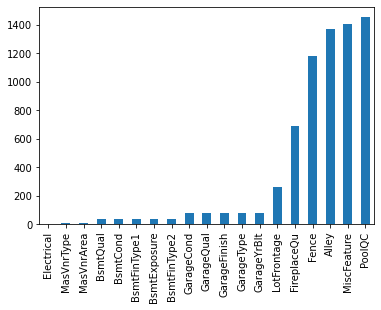

In [ ]:
missing.plot.bar()

### Feature Engineering

Add more features

In [ ]:
df_train["TotalSqrtFeet"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
df_train['YearBuilt']=df_train['YearBuilt']-df_train['YearBuilt'].min()
df_train['YearRemodAdd']=df_train['YearRemodAdd']-df_train['YearRemodAdd'].min()


df_test["TotalSqrtFeet"] = df_test["GrLivArea"] + df_test["TotalBsmtSF"]
df_test['YearBuilt']=df_test['YearBuilt']-df_test['YearBuilt'].min()
df_test['YearRemodAdd']=df_test['YearRemodAdd']-df_test['YearRemodAdd'].min()

Drop out columns that have more than 90% NANs

In [ ]:
#CODE
col_nan = df_train.isna().sum() / df_train.shape[0]
drop_out= col_nan[col_nan.sort_values(ascending=False)>0.9].index
#TEST
drop_out

Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')

Drop Useless Columns: Such as Id, Street, Utilities (These column have ame value so they have no effect on our data)

In [ ]:
#CODE
Ids=df_test['Id'].copy()
useless_cols=["PoolQC","Utilities",'Alley','Street',"Id", 'MiscFeature', 'BsmtFinType2', 'Electrical']

df_train.drop(useless_cols, axis=1, inplace=True)
df_test.drop(useless_cols, axis=1, inplace=True)

Fence: Fence quality.  The field values are defined as 
*   GdPrv	Good Privacy
*   MnPrv	Minimum Privacy
*   GdWo	Good Wood
*   MnWw	Minimum Wood/Wire
*   NA	No Fence

Make it has a different category    

In [ ]:
df_train["Fence"] = df_train["Fence"].astype('category')
df_train["Fence"] = df_train["Fence"].cat.add_categories(['MISSING'])
df_train["Fence"] = df_train["Fence"].fillna('MISSING')

df_test["Fence"] = df_test["Fence"].astype('category')
df_test["Fence"] = df_test["Fence"].cat.add_categories(['MISSING'])
df_test["Fence"] = df_test["Fence"].fillna('MISSING')

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


We will use find and replace

In [ ]:
cleanup_nums = {"FireplaceQu":     {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}}

In [ ]:

# Similarly, we fix GarageCond using find and replace
cleanup_nums['GarageCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['GarageQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['GarageFinish']= {"Fin": 3, "RFn": 2, "Unf":1, "NA":0}
cleanup_nums['BsmtQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['BsmtCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "NA":0}
cleanup_nums['BsmtExposure']= {"Gd": 4, "Av": 3, "Mn":2, "No":1, "NA":0}
cleanup_nums['BsmtFinType1']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}
cleanup_nums['BsmtFinType2']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0}

# for GarageType, NA means no garage
df_train["GarageType"] = df_train["GarageType"].astype('category')
df_train["GarageType"] = df_train["GarageType"].cat.add_categories(['MISSING'])
df_train["GarageType"] = df_train["GarageType"].fillna('MISSING')

df_test["GarageType"] = df_test["GarageType"].astype('category')
df_test["GarageType"] = df_test["GarageType"].cat.add_categories(['MISSING'])
df_test["GarageType"] = df_test["GarageType"].fillna('MISSING')

# for MasVnrType  Masonry veneer type, None means no Maonry veneer
df_train["MasVnrType"] = df_train["MasVnrType"].astype('category')
df_train["MasVnrType"] = df_train["MasVnrType"].cat.add_categories(['MISSING'])
df_train["MasVnrType"] = df_train["MasVnrType"].fillna('MISSING')

df_test["MasVnrType"] = df_test["MasVnrType"].astype('category')
df_test["MasVnrType"] = df_test["MasVnrType"].cat.add_categories(['MISSING'])
df_test["MasVnrType"] = df_test["MasVnrType"].fillna('MISSING')

# for Area, can can use the median
df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].median(), inplace=True)
df_test['MasVnrArea'].fillna(value=df_train['MasVnrArea'].median(), inplace=True)
# Lotfrontage, we will use median
df_train['LotFrontage'].fillna(value=df_train['LotFrontage'].median(), inplace=True)
df_test['LotFrontage'].fillna(value=df_train['LotFrontage'].median(), inplace=True)



In [ ]:
# we completed these with large number of missing values, let's replace
df_train = df_train.replace(cleanup_nums)
#fill NAN values as well  
df_train['FireplaceQu'].fillna(value= 0, inplace=True)
df_train['GarageCond'].fillna(value= 0, inplace=True)
df_train['GarageQual'].fillna(value= 0, inplace=True)
df_train['GarageFinish'].fillna(value= 0, inplace=True)
df_train['BsmtQual'].fillna(value= 0, inplace=True)
df_train['BsmtCond'].fillna(value= 0, inplace=True)
df_train['BsmtExposure'].fillna(value= 0, inplace=True)
df_train['BsmtFinType1'].fillna(value= 0, inplace=True)
#df_train['BsmtFinType2'].fillna(value= 0, inplace=True)

df_test = df_test.replace(cleanup_nums)
df_test['FireplaceQu'].fillna(value= 0, inplace=True)
df_test['GarageCond'].fillna(value= 0, inplace=True)
df_test['GarageQual'].fillna(value= 0, inplace=True)
df_test['GarageFinish'].fillna(value= 0, inplace=True)
df_test['BsmtQual'].fillna(value= 0, inplace=True)
df_test['BsmtCond'].fillna(value= 0, inplace=True)
df_test['BsmtExposure'].fillna(value= 0, inplace=True)
df_test['BsmtFinType1'].fillna(value= 0, inplace=True)
#df_test['BsmtFinType2'].fillna(value= 0, inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqrtFeet
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,131,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0.0,Attchd,2003.0,2.0,2,548,3.0,3.0,Y,0,61,0,0,0,0,MISSING,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,104,26,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,Y,298,0,0,0,0,0,MISSING,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,129,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,Y,0,42,0,0,0,0,MISSING,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,43,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,Y,0,35,272,0,0,0,MISSING,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,128,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,Y,192,84,0,0,0,0,MISSING,0,12,2008,WD,Normal,250000,3343


In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

GarageYrBlt    81
dtype: int64

In [ ]:
most_recent = df_train['GarageYrBlt'].max()
oldest = df_train['GarageYrBlt'].min()
period = int((most_recent - oldest)/5)
bins = [np.NINF, period, 2*period, 3*period, 4*period, 5*period, np.inf]
df_train['GarageYrBlt']= np.digitize(most_recent- df_train['GarageYrBlt'],bins,right=True)
df_test['GarageYrBlt']= np.digitize(most_recent- df_test['GarageYrBlt'],bins,right=True)
df_train['GarageYrBlt'].min()

1

In [ ]:
df_train['GarageYrBlt'].fillna(value= 7, inplace=True)
df_test['GarageYrBlt'].fillna(value= 7, inplace=True)

### Missing data test

In [ ]:
missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

Exterior1st      1
Exterior2nd      1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
KitchenQual      1
GarageCars       1
GarageArea       1
SaleType         1
TotalSqrtFeet    1
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
MSZoning         4
dtype: int64

In [ ]:
df_test['Exterior1st'].fillna(value=df_train['Exterior1st'].value_counts().index[0], inplace=True)
df_test['Exterior2nd'].fillna(value=df_train['Exterior2nd'].value_counts().index[0], inplace=True)
df_test['TotalBsmtSF'].fillna(value=df_train['TotalBsmtSF'].median(), inplace=True)
df_test['KitchenQual'].fillna(value=df_train['KitchenQual'].value_counts().index[0], inplace=True)
df_test['GarageCars'].fillna(value=df_train['GarageCars'].median(), inplace=True)
df_test['GarageArea'].fillna(value=df_train['GarageArea'].median(), inplace=True)
df_test['SaleType'].fillna(value=df_train['SaleType'].value_counts().index[0], inplace=True)
df_test['Functional'].fillna(value=df_train['Functional'].value_counts().index[0], inplace=True)
df_test['MSZoning'].fillna(value=df_train['MSZoning'].value_counts().index[0], inplace=True)
df_test['BsmtFinSF1'].fillna(value=df_train['BsmtFinSF1'].median(), inplace=True)
df_test['BsmtFinSF2'].fillna(value=df_train['BsmtFinSF2'].median(), inplace=True)
df_test['BsmtUnfSF'].fillna(value=df_train['BsmtUnfSF'].median(), inplace=True)
df_test['BsmtFullBath'].fillna(value=df_train['BsmtFullBath'].median(), inplace=True)
df_test['BsmtHalfBath'].fillna(value=df_train['BsmtHalfBath'].median(), inplace=True)
df_test.TotalSqrtFeet=df_test.TotalSqrtFeet.fillna(0)

### Correlation matrix

In [ ]:
correlation_matrix = df_train.corr().round(2)
correlation_matrix['SalePrice'].sort_values()

GarageYrBlt     -0.47
KitchenAbvGr    -0.14
EnclosedPorch   -0.13
OverallCond     -0.08
MSSubClass      -0.08
LowQualFinSF    -0.03
YrSold          -0.03
BsmtHalfBath    -0.02
MiscVal         -0.02
BsmtFinSF2      -0.01
3SsnPorch        0.04
MoSold           0.05
PoolArea         0.09
ScreenPorch      0.11
BedroomAbvGr     0.17
BsmtCond         0.21
BsmtUnfSF        0.21
BsmtFullBath     0.23
LotArea          0.26
GarageCond       0.26
GarageQual       0.27
HalfBath         0.28
BsmtFinType1     0.30
OpenPorchSF      0.32
2ndFlrSF         0.32
WoodDeckSF       0.32
LotFrontage      0.33
BsmtExposure     0.37
BsmtFinSF1       0.39
Fireplaces       0.47
MasVnrArea       0.47
YearRemodAdd     0.51
FireplaceQu      0.52
YearBuilt        0.52
TotRmsAbvGrd     0.53
GarageFinish     0.55
FullBath         0.56
BsmtQual         0.59
1stFlrSF         0.61
TotalBsmtSF      0.61
GarageArea       0.62
GarageCars       0.64
GrLivArea        0.71
TotalSqrtFeet    0.78
OverallQual      0.79
SalePrice 

**Qualitative Data**

In [ ]:
# get a list of qulitative features
qualitative = df_train.select_dtypes(exclude= ['int64', 'float64'])
qualitative

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Attchd,Y,MISSING,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Detchd,Y,MISSING,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Attchd,Y,MISSING,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,GasA,TA,Y,TA,Min1,Attchd,Y,MnPrv,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,GasA,Ex,Y,Gd,Typ,Attchd,Y,GdPrv,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Gd,Y,Gd,Typ,Attchd,Y,MISSING,WD,Normal


### Encoding

Use cross validation to choose between KNN or linear regression models.
Compare their performance and try to justify why a model's performance is good or bad?
Use GridSearch CV for tuning your final model.

In [ ]:
y_train=df_train['SalePrice']
x_train = df_train.loc[:, df_train.columns != 'SalePrice']
ohe = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, qualitative.columns)],
        remainder="passthrough")
X_train_encoded = preprocessor.fit_transform(x_train)
X_test_encoded = preprocessor.transform(df_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

lin_reg = make_pipeline(RobustScaler(), LinearRegression()) #Scales features to decerase outliers effect 

lin_reg.fit(X_train_encoded, y_train)
#lin_reg.intercept_, lin_reg.coef_

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
y_predicted = lin_reg.predict(X_train_encoded)
mse = mean_squared_error(y_train, y_predicted)
r2 = r2_score(y_train, y_predicted)
print(mse)
print(r2)

465099197.337536
0.9262541956110653


In [ ]:
#Problem here
clf1=RidgeCV()
scores1 = cross_val_score(clf1, X_train_encoded, y_train,scoring='r2', cv=10)
print('Average Score for Linear Regression = {}'.format(np.round(scores1.mean(),2)))

clf2 = KNeighborsRegressor()
scores = cross_val_score(clf2, X_train_encoded, y_train,scoring='r2', cv=10)
print('Average Score for KNeighborsClassifier = {}'.format(np.round(scores.mean(),2)))

Average Score for Linear Regression = 0.84
Average Score for KNeighborsClassifier = 0.68


Due to large number of columns (high dimensionality) KNN don't do K-folds well, Linear regression is better

In [ ]:
K_range = list(range(1, 31)) #K neighbors to try

#grid parameters to try
param_grid = {'n_neighbors': K_range,
             'p': [1,2]}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search=grid.fit(X_train_encoded, y_train)

In [ ]:
#get the best parameters
print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

{'n_neighbors': 12, 'p': 1}
Best Acc =  72.97844006715694
